**PROBLEM STATEMENT**

Sleep disorders increase rapidly in mental and physical health and represent a developing concern in global terms. Their causes consist of environmental determinants, stress, food, and lifestyle choices. Early detection of these variables can enhance sleep hygiene and minimize health risks, but conventional diagnostic techniques are expensive and difficult to use. It could assist in the early discovery of sleep disorders and thus facilitate diagnosis, possibly with preventative intervention. Such a model would form a workable and more affordable approach to improving sleep and the general well-being condition, which will challenge the difficulty of trying to understand the very complex causes of sleep problems.




**PROPOSED SOLUTION**

**Data-driven predictions -:** Using machine learning algorithms for analyzing datasets that include lifestyle metrics such as activity levels, diet, screen time, and stress as well as sleep data including sleep duration, cycles, and disturbances.

**Importing libraries**

In [1]:
## Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')
import pickle

**Loading the dataset**

In [2]:
## Load the required dataset
data=pd.read_csv('/content/SleepDisorder_final.csv')

**Exploratory Data Analysis (EDA)**

In [3]:
## Dimensions of dataset
data.shape

(373, 13)

In [4]:
## Basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    object 
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    int64  
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    object 
 9   Blood Pressure           373 non-null    object 
 10  Heart Rate               373 non-null    int64  
 11  Daily Steps              373 non-null    int64  
 12  Sleep Disorder           373 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.0+ KB


In [5]:
## First 5 rows of dataset
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
## Drop unnecessary columns
data=data.drop(columns=['Person ID'],axis=1)
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [7]:
## Basic statistical details about dataset
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,42.176944,7.132708,7.313673,59.182306,5.386059,70.152815,6820.375335
std,8.683553,0.796634,1.198454,20.857659,1.776798,4.133618,1618.645680
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


**Data Visualization**

In [8]:
## Rename column names
data=data.rename(
    columns={
    'Sleep Disorder':'Sleep_Disorder',
    'Sleep Duration':'Sleep_Duration',
    'Quality of Sleep':'Quality_of_Sleep',
    'Physical Activity Level':'Physical_Activity_Level',
    'Stress Level':'Stress_Level',
    'BMI Category':'BMI_Category',
    'Blood Pressure':'Blood_Pressure',
    'Heart Rate':'Heart_Rate',
    'Daily Steps':'Daily_Steps'
    })

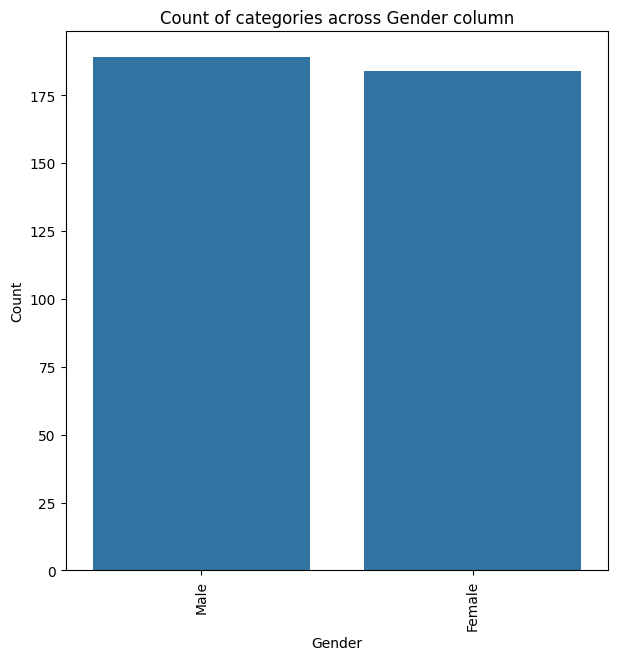

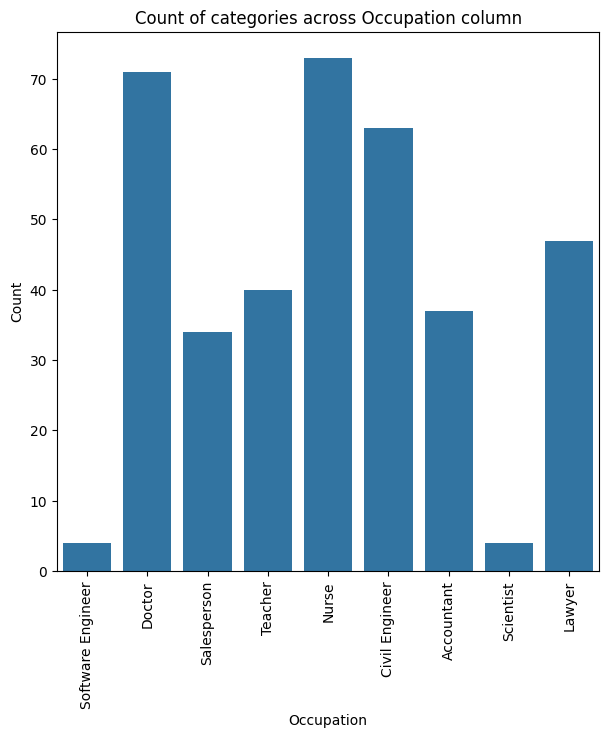

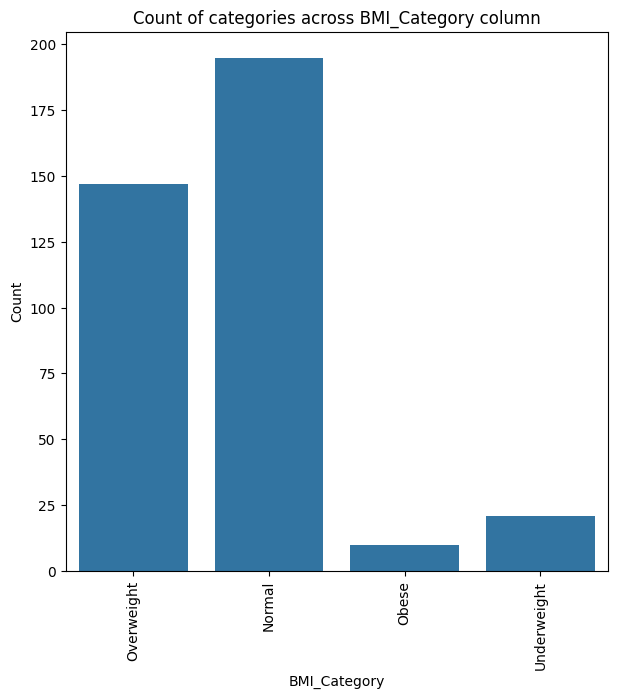

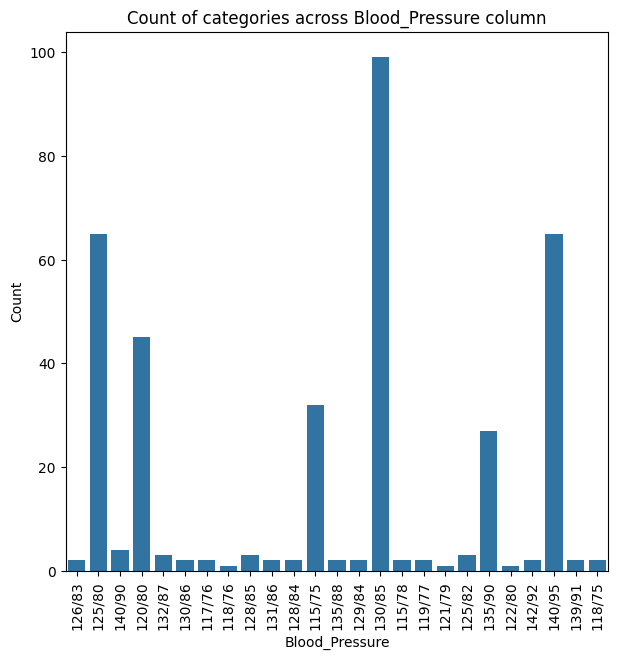

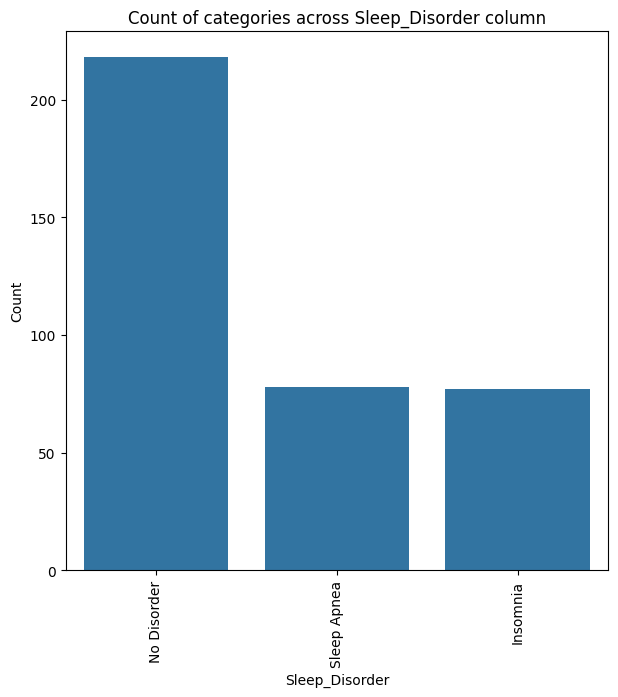

In [9]:
## Count of categories across different categorical columns of dataset using Countplot
categorical_columns=[]
for i in data.columns:
  if data[i].dtypes=='object':
    categorical_columns.append(i)##List of all categorical columns
for col in categorical_columns:
  plt.figure(figsize=(7,7))
  sns.countplot(x=col,data=data)
  plt.xlabel(col)
  plt.xticks(rotation=90)
  plt.ylabel('Count')
  plt.title('Count of categories across '+col+' column')
  plt.show()

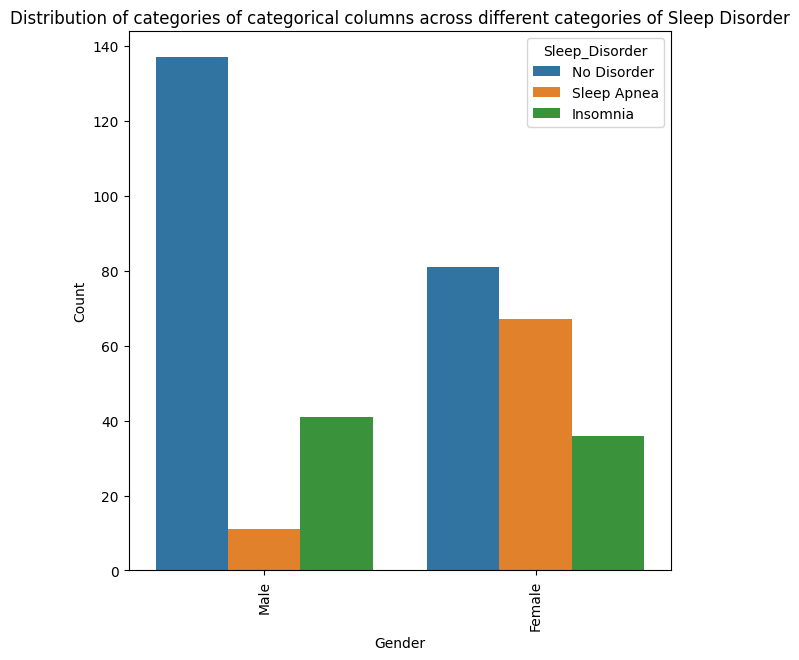

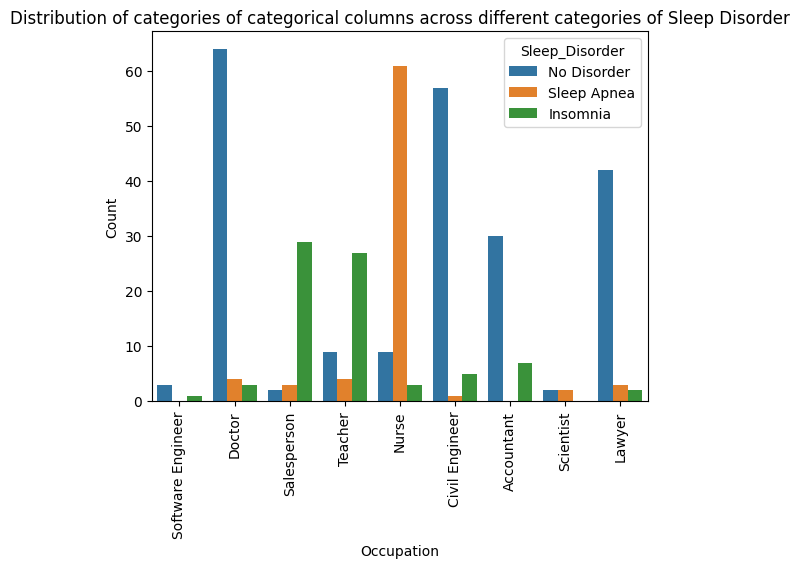

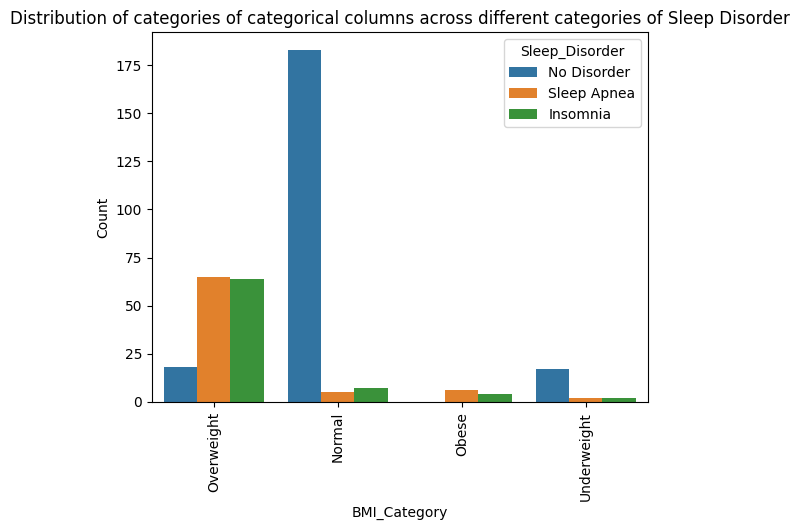

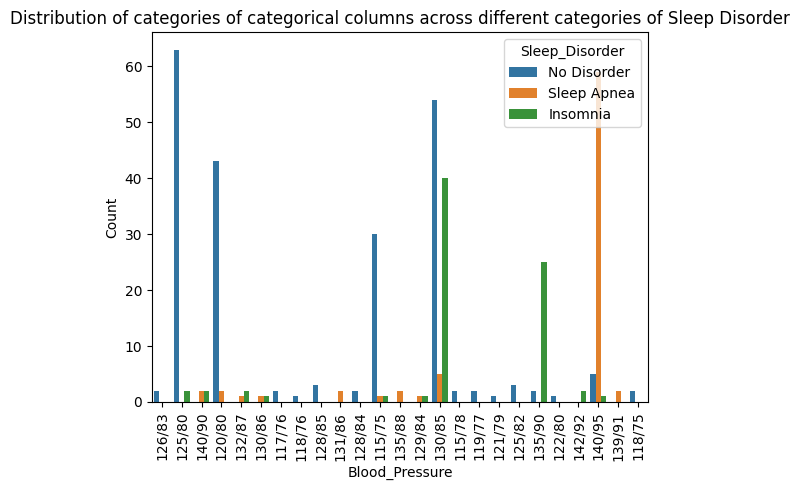

In [10]:
## Distribution of categories of categorical columns across different categories of Sleep Disorder
plt.figure(figsize=(7,7))
for col in categorical_columns:
  if col!='Sleep_Disorder':
    sns.countplot(x=col,hue='Sleep_Disorder',data=data)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title('Distribution of categories of categorical columns across different categories of Sleep Disorder')
    plt.show()

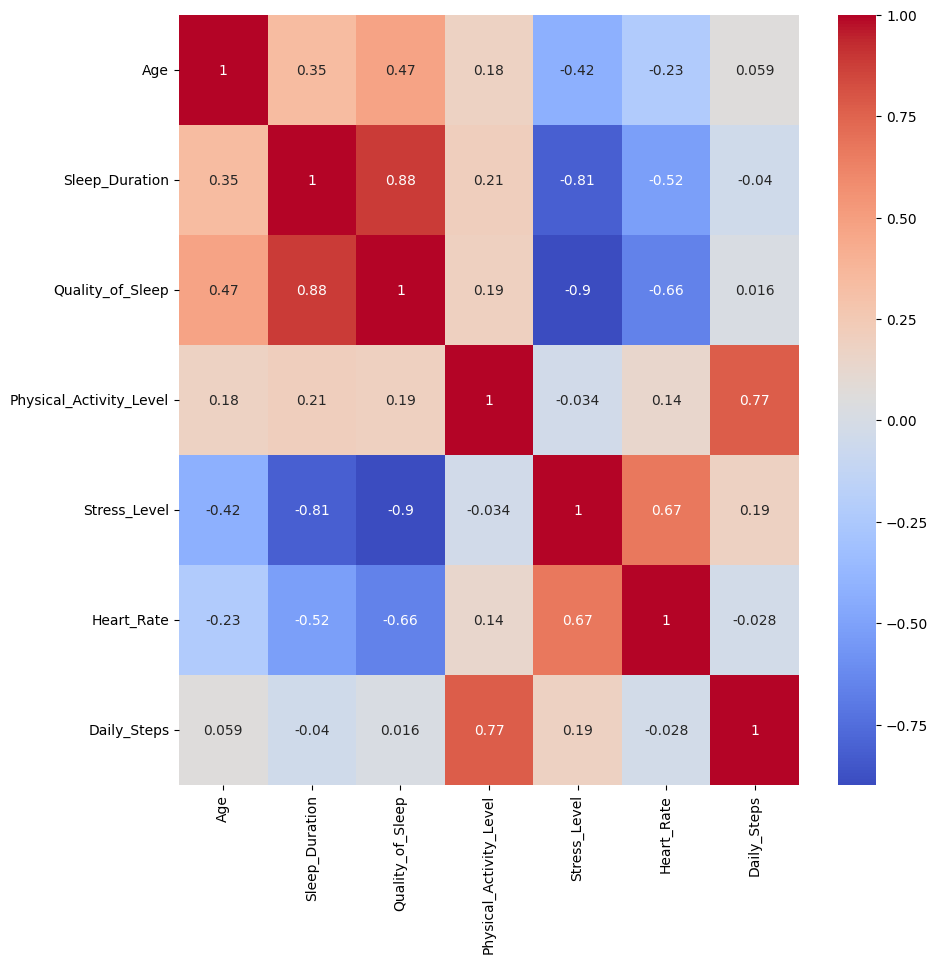

In [11]:
## Correlation between columns using heatmap of correlation matrix
num_cols=[]
for i in data.columns:
  if data[i].dtypes=='int64' or data[i].dtypes=='float64':
    num_cols.append(i)##List of all numerical columns
num_data=pd.DataFrame(data,columns=num_cols)## New dataframe for numerical columns

plt.figure(figsize=(10,10))
sns.heatmap(num_data.corr(),annot=True,cmap='coolwarm')
plt.show()

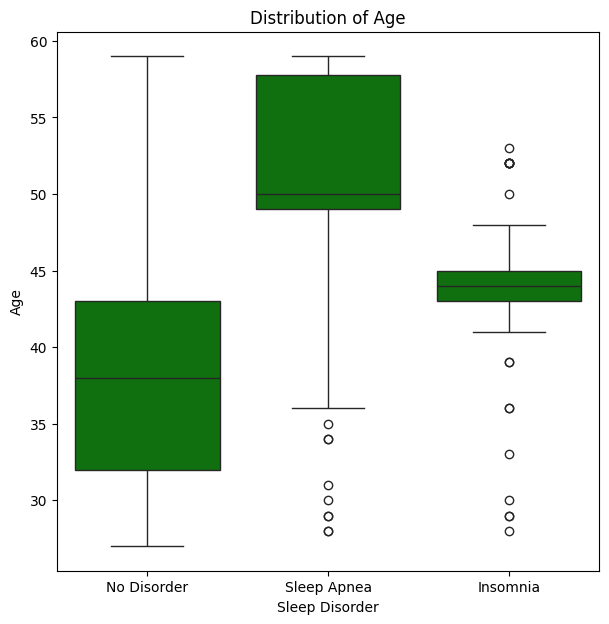

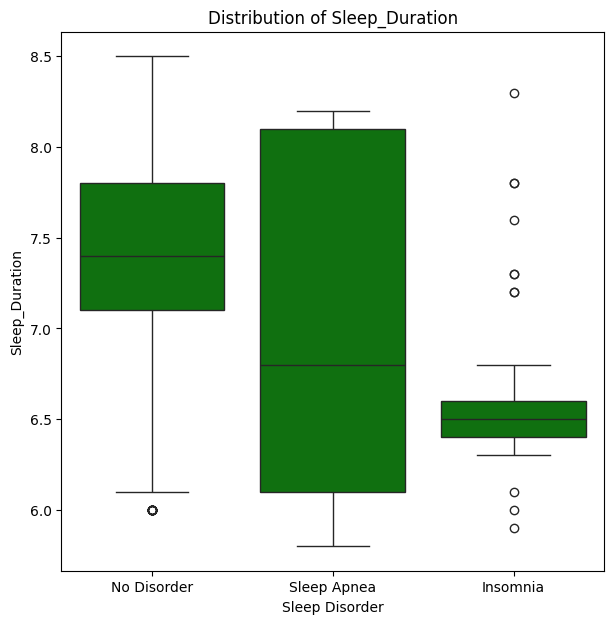

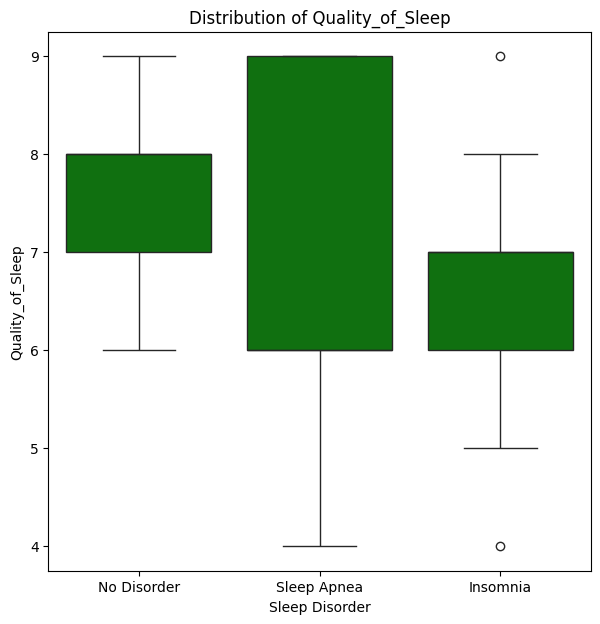

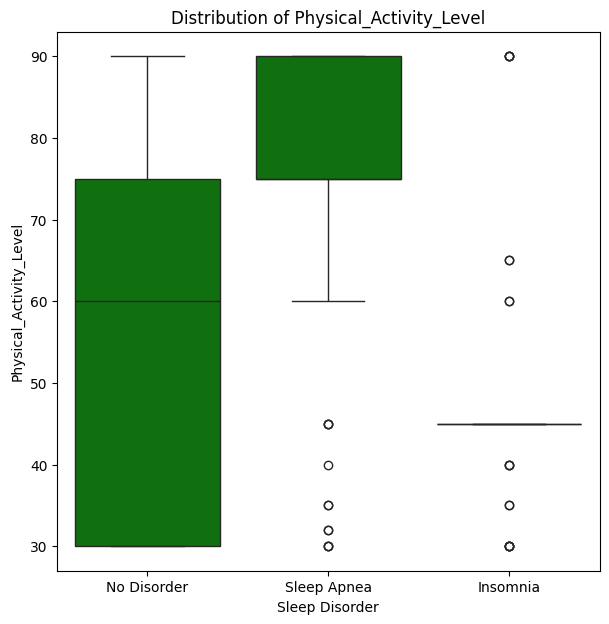

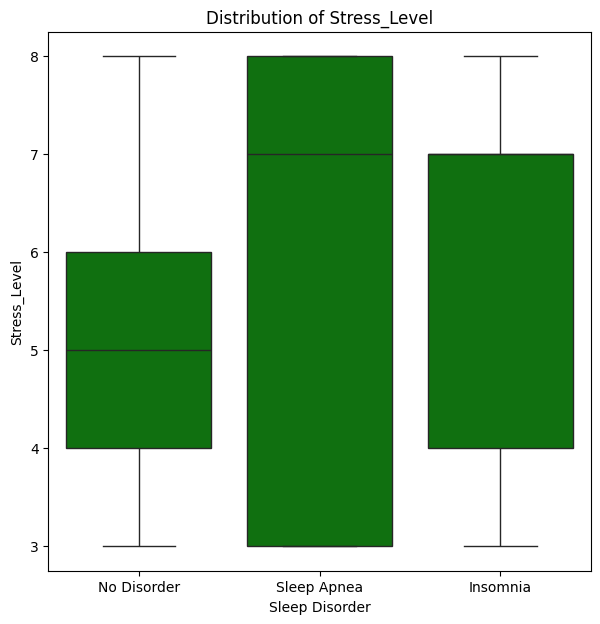

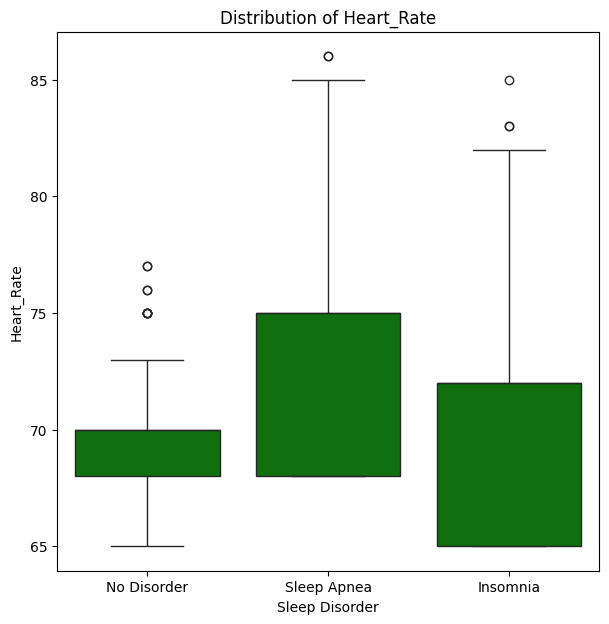

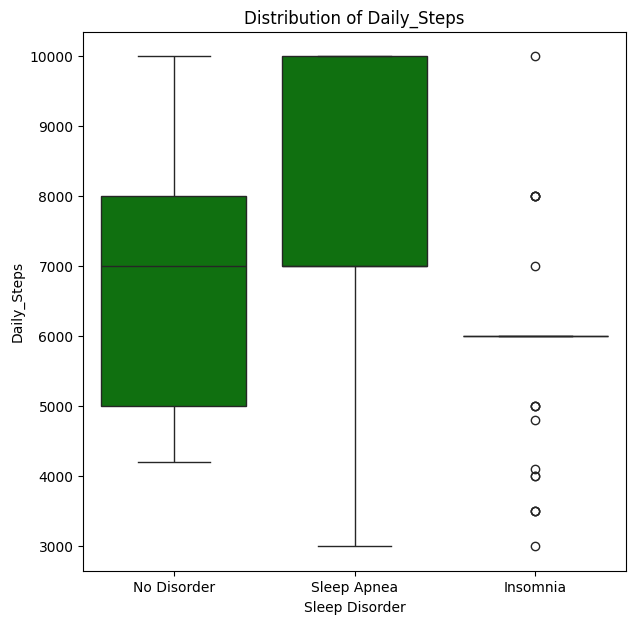

In [12]:
## Distribution of continous features across 'Sleep Disorder'(target) column
for col in num_cols:
   plt.figure(figsize=(7,7))
   sns.boxplot(y=data[col],x=data['Sleep_Disorder'],color='green')
   plt.xlabel('Sleep Disorder')
   plt.ylabel(col)
   plt.title(f'Distribution of {col}')
   plt.show()

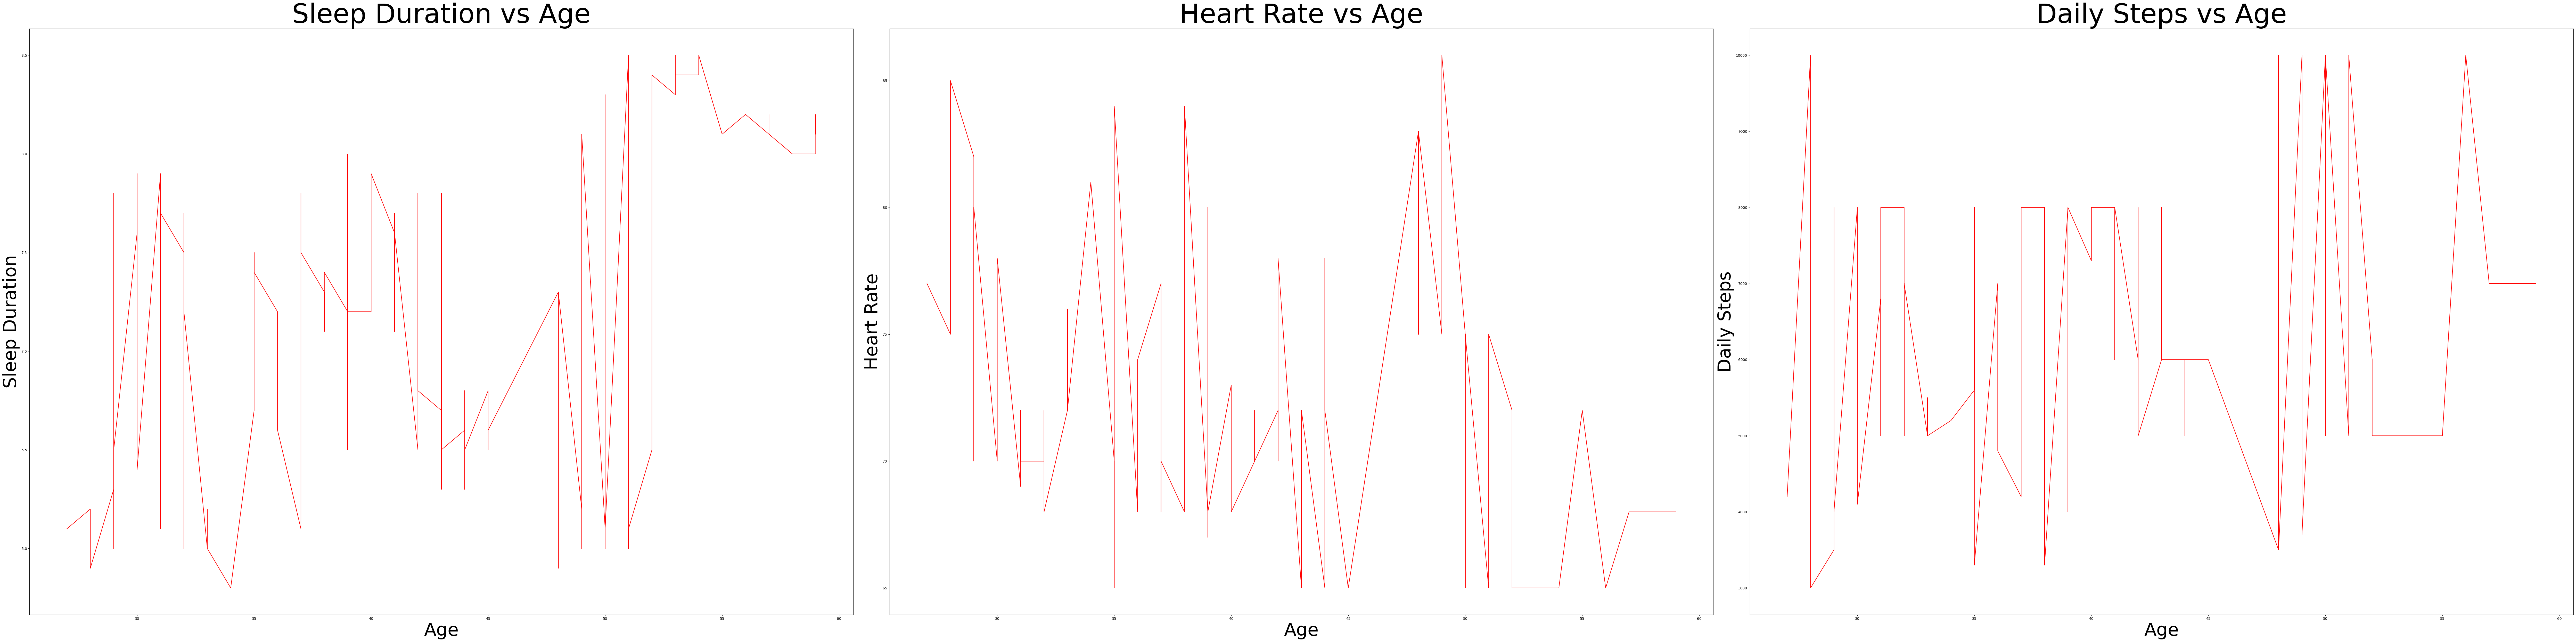

In [13]:
## Relation of 'Blood Pressure' and 'Heart Rate' columns with 'Age' column
fig,axes=plt.subplots(1,3,figsize=(100,25))
axes[0].plot(data['Age'],data['Sleep_Duration'],color='red')
axes[0].set_xlabel('Age',fontsize=50)
axes[0].set_ylabel('Sleep Duration',fontsize=50)
axes[0].set_title('Sleep Duration vs Age',fontsize=75)
axes[1].plot(data['Age'],data['Heart_Rate'],color='red')
axes[1].set_xlabel('Age',fontsize=50)
axes[1].set_ylabel('Heart Rate',fontsize=50)
axes[1].set_title('Heart Rate vs Age',fontsize=75)
axes[2].plot(data['Age'],data['Daily_Steps'],color='red')
axes[2].set_xlabel('Age',fontsize=50)
axes[2].set_ylabel('Daily Steps',fontsize=50)
axes[2].set_title('Daily Steps vs Age',fontsize=75)
plt.tight_layout()
plt.show()

**Data Preprocessing**

In [15]:
## Label encoding of 'Blood Pressure' column
le=LabelEncoder()
le.fit(data['Blood_Pressure'])
data['Blood_Pressure']=le.transform(data['Blood_Pressure'])
data['Blood_Pressure'].dtypes

dtype('int64')

In [16]:
## One hot encoding of other categorical columns in predictors dataset
categorical_columns=[]
for i in data.columns:
  if data[i].dtypes=='object':
    categorical_columns.append(i)## List of all categorical columns
ohe=OneHotEncoder(sparse_output=False)
encoded=ohe.fit_transform(data[categorical_columns])
one_hot_data=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(categorical_columns))
data=pd.concat([data,one_hot_data],axis=1)
data=pd.DataFrame(data.drop(columns=categorical_columns))
data.head()

,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,Blood_Pressure,Heart_Rate,Daily_Steps,Gender_Female,Gender_Male,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI_Category_Normal,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight,Sleep_Disorder_Insomnia,Sleep_Disorder_No Disorder,Sleep_Disorder_Sleep Apnea
0,27,6.1,6,42,6,11,77,4200,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,28,6.2,6,60,8,9,75,10000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,6.2,6,60,8,9,75,10000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28,5.9,4,30,8,22,85,3000,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,28,5.9,4,30,8,22,85,3000,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [17]:
## Divide the dataset into predictor and target columns
x=data.drop(columns=['Sleep_Disorder_Insomnia','Sleep_Disorder_No Disorder','Sleep_Disorder_Sleep Apnea'],axis=1)## Predictor columns except 'Sleep_Disorder_No Disorder','Sleep_Disorder_Sleep Apnea' and 'Sleep_Disorder_Insomnia'
y=data[['Sleep_Disorder_Insomnia','Sleep_Disorder_No Disorder','Sleep_Disorder_Sleep Apnea']]## Target columns i.e.'Sleep_Disorder_No Disorder','Sleep_Disorder_Sleep Apnea' and 'Sleep_Disorder_Insomnia'

In [18]:
## Split the dataset into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
## Check dimensions of splitted training and testing datasets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(298, 23)
(75, 23)
(298, 3)
(75, 3)


In [20]:
## Standardization of training and testing datasets using StandardScaler
sc=StandardScaler()
x_train=pd.DataFrame(sc.fit_transform(x_train))
x_test=pd.DataFrame(sc.transform(x_test))
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.055839,-0.820854,-1.141845,-0.743518,0.939986,0.249727,0.473843,-0.570738,-1.041113,1.041113,...,-0.370681,-0.517769,3.45782,-0.116642,-0.082199,-0.35887,-1.027216,-0.143346,1.217922,-0.260960
1,-1.107789,-1.452606,-1.141845,-1.462429,1.503599,-0.575617,0.473843,-1.190338,-1.041113,1.041113,...,-0.370681,-0.517769,-0.28920,-0.116642,-0.082199,-0.35887,0.973505,-0.143346,-0.821071,-0.260960
2,-0.875064,0.442650,0.546839,-0.024607,-0.187241,-0.988289,-0.020746,0.668460,-1.041113,1.041113,...,-0.370681,-0.517769,-0.28920,-0.116642,12.165525,-0.35887,-1.027216,-0.143346,-0.821071,3.831998
3,1.917643,1.327104,1.391180,0.694304,-1.314467,1.350185,-0.515335,0.048861,0.960511,-0.960511,...,-0.370681,1.931362,-0.28920,-0.116642,-0.082199,-0.35887,-1.027216,-0.143346,1.217922,-0.260960
4,-1.573240,-0.820854,-1.986186,-0.983155,0.939986,0.662399,2.452198,-1.809937,0.960511,-0.960511,...,-0.370681,1.931362,-0.28920,-0.116642,-0.082199,-0.35887,-1.027216,-0.143346,-0.821071,3.831998


**Model Training**

We will choose three classification models for the given task -:

-> Decision Tree Classifier

-> Random Forest Classifier

-> K-Nearest Neighbours Classifier

In [21]:
## Initialize suitable classification models
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
KNN=KNeighborsClassifier()
models=[DT,RF,KNN]## Store each model into a list

In [22]:
## Fit the training data into models
for i in models:
  i=i.fit(x_train,y_train)

**Prediction and Evaluation**

In [23]:
## Predict for testing data and evaluate performance of each model using accuracy_score
for i in models:
  print('ACCUARCY_SCORE for',i,':',accuracy_score(y_test,i.predict(x_test)))

ACCUARCY_SCORE for DecisionTreeClassifier() : 0.88
ACCUARCY_SCORE for RandomForestClassifier() : 0.88
ACCUARCY_SCORE for KNeighborsClassifier() : 0.84


In [24]:
## Classification report of each model
for i in models:
   LR_report=classification_report(y_test,i.predict(x_test))
   rep_lines=LR_report.split('\n')
   rep_lines=rep_lines[2:]
   df=[]
   for line in rep_lines:
      if line.strip():
         row=line.strip().split()
         df.append({'class':row[0],'precision':row[1],'recall':row[2]})
   print('Classification Report for '+str(i)+'\n',pd.DataFrame(df))

Classification Report for DecisionTreeClassifier()
       class precision recall
0         0      0.78   0.82
1         1      0.93   0.98
2         2      0.91   0.67
3     micro       avg   0.89
4     macro       avg   0.87
5  weighted       avg   0.89
6   samples       avg   0.88
Classification Report for RandomForestClassifier()
       class precision recall
0         0      0.74   0.82
1         1      0.93   0.98
2         2      0.91   0.67
3     micro       avg   0.88
4     macro       avg   0.86
5  weighted       avg   0.88
6   samples       avg   0.88
Classification Report for KNeighborsClassifier()
       class precision recall
0         0      0.70   0.82
1         1      0.93   0.93
2         2      1.00   0.60
3     micro       avg   0.88
4     macro       avg   0.88
5  weighted       avg   0.89
6   samples       avg   0.84


According to above evaluation results, **Decision Tree Classifier** as our final model with highest accuarcy of **90.67%**.

**Fine Tuning of Decision Tree Classifier**

In [25]:
## Fine-tune Decision Tree Classifier using GridSearch Cross-Validation
params_grid={
    'max_depth':[2,4,5,6,9,12],
    'min_samples_split':[5,7,10,12,15,18],
    'min_samples_leaf':[2,4,6,8,10,12]
}
grid_search=GridSearchCV(models[0],param_grid=params_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)## Fit the training data into Decision Tree Classification model

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 5, 6, 9, 12],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [5, 7, 10, 12, 15, 18]},
             verbose=2)

**Prediction and Evaluation**

In [26]:
best_parameters=grid_search.best_params_## Find best parameters for model
best_estimator=grid_search.best_estimator_## Find best estimating model

prediction=best_estimator.predict(x_test)## Predict for testing data
accuracy=accuracy_score(y_test,prediction)## New Acuuracy_score after fine-tuning
print('Best Parameters : ',best_parameters)## Print best parameters
print('Accuracy : ',accuracy)## Print accuracy

Best Parameters :  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy :  0.88


**Model Saving**

In [27]:
## Save the model and other preprocessing tools using 'pickle' library
with open('labelencoder.pkl','wb') as f1:
  pickle.dump(le,f1)## Save LabelEncoder

with open('OHE.pkl','wb') as f2:
  pickle.dump(ohe,f2)## Save OneHotEncoder

with open('standardscaler.pkl','wb') as f3:
  pickle.dump(sc,f3)## Save StandardScaler

with open('DTree.pkl','wb') as file:
  pickle.dump(best_estimator,file)## Save Decision Tree Classifier model

**Prediction(with new data) using trained Random Forest Classifier**

In [29]:
'''## Load the saved model and preprocessing tools
with open('/content/DTree.pkl','rb') as f1:
  model=pickle.load(f1)## Load DTree model

with open('/content/labelencoder.pkl','rb') as f2:
  model=pickle.load(f2)## Load LabelEncoder

with open('/content/OHE.pkl','rb') as f3:
  model=pickle.load(f3)## Load LabelEncoder

with open('/content/standardscaler.pkl','rb') as f4:
  model=pickle.load(f4)## Load StandardScaler

## Give required inputs
print('Give your personal details below :\n')
gender=str(input('Enter your gender(Male/Female) :\n'))
Age=int(input('Enter your age :\n'))
Occupation=str(input('Enter your occupation :\n'))
Sleep_Duration=float(input('Enter your sleep duration(in hrs) :\n'))
Quality_of_sleep=float(input('Enter your sleep quality in range 1-10 :\n'))
Physical_Activity_level=int(input('Enter your physical activity level in range 1-100 :\n'))
Stress_level=int(input('Enter your stress level in range 1-10 :\n'))
BMI_category=str(input('Enter BMI category(Overweight/Normal/Obese/Underweight) :\n'))
Blood_pressure=str(input('Enter your blood pressure(E.g. - 120/80) :\n'))
Heart_Rate=int(input('Enter your heart rate(in bpm) :\n'))
Daily_steps=int(input('Enter your number of daily_steps(approx.) :\n'))

## Store the inputs into a dataframe
inputs={
    'Gender':gender,
    'Age':Age,
    'Occupation':Occupation,
    'Sleep Duration':Sleep_Duration,
    'Quality of sleep':Quality_of_sleep,
    'Physical Activity Level':Physical_Activity_level,
    'Stress Level':Stress_level,
    'BMI Category':BMI_category,
    'Blood Pressure':Blood_pressure,
    'Heart Rate':Heart_Rate,
    'Daily Steps':Daily_steps
}
df=pd.DataFrame(inputs)

## Preprocess inputs
df['Blood Pressure']=f2.transform(df['Blood Pressure'])

cat_cols=[]
for i in df.columns:
  if df[i].dtypes=='object':
    cat_cols.append(i)
encoded=f3.transform(df[cat_cols])
one_hot_data=pd.DataFrame(encoded,columns=f3.get_feature_names_out(cat_cols))
df=pd.concat([df,one_hot_data],axis=1)
df=pd.DataFrame(df.drop(columns=cat_cols))

df=pd.DataFrame(f4.transform(df))

## Prediction of sleep disorder
prediction=f1.predict(df)
prediction=np.argmax(prediction)
if prediction==0:
  print('You have sleep disorder : Insomnia')
elif prediction==1:
  print('NO sleep disorder')
else:
  print('You have sleep disorder : Sleep Apnea')'''

"## Load the saved model and preprocessing tools\nwith open('/content/DTree.pkl','rb') as f1:\n  model=pickle.load(f1)## Load DTree model\n\nwith open('/content/labelencoder.pkl','rb') as f2:\n  model=pickle.load(f2)## Load LabelEncoder\n\nwith open('/content/OHE.pkl','rb') as f3:\n  model=pickle.load(f3)## Load LabelEncoder\n\nwith open('/content/standardscaler.pkl','rb') as f4:\n  model=pickle.load(f4)## Load StandardScaler\n\n## Give required inputs\nprint('Give your personal details below :\n')\ngender=str(input('Enter your gender(Male/Female) :\n'))\nAge=int(input('Enter your age :\n'))\nOccupation=str(input('Enter your occupation :\n'))\nSleep_Duration=float(input('Enter your sleep duration(in hrs) :\n'))\nQuality_of_sleep=float(input('Enter your sleep quality in range 1-10 :\n'))\nPhysical_Activity_level=int(input('Enter your physical activity level in range 1-100 :\n'))\nStress_level=int(input('Enter your stress level in range 1-10 :\n'))\nBMI_category=str(input('Enter BMI cate